# Titanic - Machine Learning from Disaster

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train=pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test=pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.shape,test.shape

((891, 12), (418, 11))

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Missing Value

In [7]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [10]:
Y=train.pop('Survived')

Drop

In [11]:
train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

Filling Missing Value

In [12]:
num_cols=train.select_dtypes(include=np.number).columns.tolist()
cat_cols = train.select_dtypes(exclude=np.number).columns.tolist()

In [13]:
from sklearn.impute import SimpleImputer

imp=SimpleImputer(strategy='median')

imp.fit(train[num_cols])

train[num_cols]=imp.transform(train[num_cols])
test[num_cols]=imp.transform(test[num_cols])

In [14]:
imp2=SimpleImputer(strategy='most_frequent')

imp2.fit(train[cat_cols])

train[cat_cols] = imp2.transform(train[cat_cols])

Scaling

In [15]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaler.fit(train[num_cols])

train[num_cols] = scaler.transform(train[num_cols])
test[num_cols] = scaler.transform(test[num_cols])

Adding a new column 'Alone'

In [16]:
x=np.array(train["SibSp"])
y=np.array(train['Parch'])

z=x+y
k=[0 if z[i]==0 else 1 for i in range(len(z))]
k=np.array(k)

train['Alone']=k

In [17]:
x=np.array(test["SibSp"])
y=np.array(test['Parch'])

z=x+y
k=[0 if z[i]==0 else 1 for i in range(len(z))]
k=np.array(k)

test['Alone']=k

Mutual infomation

In [18]:
from sklearn.feature_selection import mutual_info_classif

X=train.copy()

for colname in X.select_dtypes(["object", "category"]):
  X[colname], _ = X[colname].factorize()


mi=np.zeros(8)
for i in range(50):
  mi_scores = mutual_info_classif(X, Y)
  mi=mi+mi_scores

mi_scores = pd.Series(mi/50, name="MI Scores", index=X.columns)
mi_scores = mi_scores.sort_values(ascending=False)
print(mi_scores)

Sex         0.150084
Fare        0.131602
Pclass      0.056402
SibSp       0.021643
Age         0.021632
Parch       0.021405
Embarked    0.013482
Alone       0.007142
Name: MI Scores, dtype: float64


In [19]:
train.drop('Alone',axis=1,inplace=True)
test.drop('Alone',axis=1,inplace=True)

Correlation

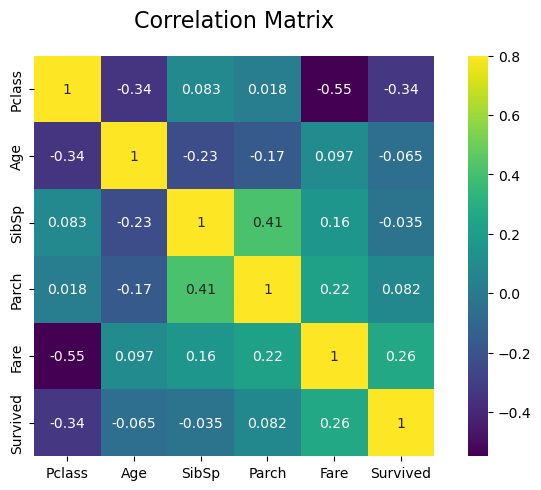

In [20]:
data = pd.concat([train[num_cols], pd.Series(Y, name='Survived')], axis=1)

correlation=data.corr()

f, ax = plt.subplots(figsize=(7, 5))

plt.title('Correlation Matrix', y=1.05, size=16)

sns.heatmap(correlation, square=True, vmax=0.8, cmap='viridis', ax=ax,annot=True) 

plt.tight_layout()
plt.show()

OneHot Encoder

In [21]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')

encoder.fit(train[cat_cols])

encoded_cols=list(encoder.get_feature_names(cat_cols))

train[encoded_cols] = encoder.transform(train[cat_cols])
test[encoded_cols] = encoder.transform(test[cat_cols])

In [22]:
train.drop(cat_cols,axis=1,inplace=True)
test.drop(cat_cols,axis=1,inplace=True)

Model

In [24]:
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

In [25]:
model = {}
model['KNeighborClassifier'] = KNeighborsClassifier(n_jobs=-1)
model['LogisticRegression'] = LogisticRegression(n_jobs=-1) 
model['DecisionTreeClassifier'] = DecisionTreeClassifier()
model['RandomForestClassifier'] = RandomForestClassifier(n_jobs=-1)
model['SVC'] = SVC()
model['GradientBoostingClassifier'] = GradientBoostingClassifier()
model['AdaBoostClassifier'] = AdaBoostClassifier()
model['XGBClassifier'] = XGBClassifier(nthread=-1)
model['CatBoostClassifier'] = CatBoostClassifier(thread_count=-1,verbose=0)
model['LGBMClassifier'] = LGBMClassifier(n_jobs=-1,verbose=0)
model['GaussianNB'] = GaussianNB()
model['BernoulliNB'] = BernoulliNB()

In [26]:
from sklearn.model_selection import train_test_split,cross_val_score

X1,X2,Y1,Y2=train_test_split(train,Y,test_size=0.2)

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

In [28]:
Model=[]
cv_score=[]
acc=[]
pre=[]
rec=[]
f1_=[]

In [29]:
for i in model:
    mod=model[i]
    
    cv=cross_val_score(mod,train,Y,cv=3)
    cv=np.array(cv)
    cv=np.mean(cv)
    
    mod.fit(X1,Y1)
    y_pred = mod.predict(X2)
    
    accuracy = accuracy_score(Y2, y_pred)
    
    precision = precision_score(Y2, y_pred)
    recall = recall_score(Y2, y_pred)
    f1 = f1_score(Y2, y_pred)
    
    Model.append(i)
    cv_score.append(cv)
    acc.append(accuracy)
    pre.append(precision)
    rec.append(recall)
    f1_.append(f1)

df=pd.DataFrame({'model':Model,'cv_score':cv_score,'accuracy':acc,'precision':pre,'recall':rec,'f1_score':f1_})

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [33]:
df.sort_values(by='cv_score',ascending=False)

,model,cv_score,accuracy,precision,recall,f1_score
4,SVC,0.827160,0.821229,0.906250,0.690476,0.783784
9,LGBMClassifier,0.820426,0.787709,0.859375,0.654762,0.743243
8,CatBoostClassifier,0.819304,0.810056,0.903226,0.666667,0.767123
5,GradientBoostingClassifier,0.809203,0.815642,0.892308,0.690476,0.778523
7,XGBClassifier,0.800224,0.776536,0.823529,0.666667,0.736842
3,RandomForestClassifier,0.793490,0.770950,0.794521,0.690476,0.738854
0,KNeighborClassifier,0.789001,0.810056,0.878788,0.690476,0.773333
1,LogisticRegression,0.786756,0.804469,0.876923,0.678571,0.765101
6,AdaBoostClassifier,0.786756,0.793296,0.821918,0.714286,0.764331
10,GaussianNB,0.782267,0.787709,0.802632,0.726190,0.762500


# models

Model 

In [51]:
param_grid={
  'C' : [0.1,0.5,1,100,500,1000],
  'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
  'degree':[2,3,4,5,6,7,8,9,10],
  'gamma':['scale','auto']
  }

In [53]:
mod1=GridSearchCV(estimator=SVC()
,param_grid=param_grid,
cv=3,scoring='f1',verbose=1,n_jobs=-1)

mod1.fit(train,Y)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
[Parallel(n_jobs=-1)]: Done  56 task

GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 0.5, 1, 100, 500, 1000],
                         'degree': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='f1', verbose=1)

In [54]:
best_r_f=mod1.best_estimator_

pred=best_r_f.predict(test)

rt=pd.DataFrame({'Passengerid':[i for i in range(892,1310)],'Survived':pred})

rt.to_csv('sub5.csv', index=False)